In [362]:
import librosa 
import numpy as np
import matplotlib.pyplot as plt 
import os,glob

In [363]:
path_ratio = "/home/data/kbh/DCASE2022/raw/4/"
path_amount = "/home/data/kbh/DCASE2022/raw/2/"


In [364]:
list_ratio = [x for x in glob.glob(os.path.join(path_ratio,"*.wav"))]
print(len(list_ratio))
list_amount = [x for x in glob.glob(os.path.join(path_amount,"*.wav"))]
print(len(list_amount))

691
349


In [365]:
sr = 24000
len_sec = 30.0

n_total_sample = int(sr*len_sec)
raw = np.zeros(n_total_sample)
print(raw.shape)

(720000,)


## Label

In [366]:
label = np.zeros((int(sr*len_sec/(2400)),3)) # [n_label_frame, max_class, (class,azimuth,elevation)]
label[:,0]=-1

## Ratio

In [367]:
ratio = 0.5
pad_expand_ratio = 1.0

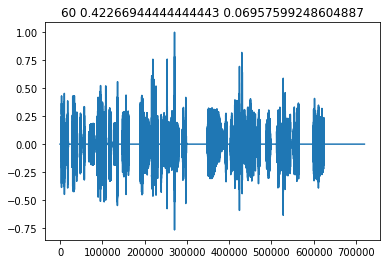

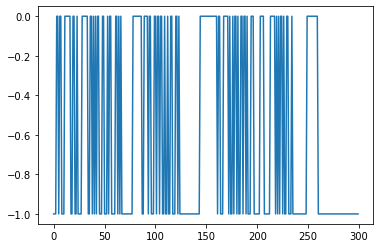

In [372]:
raw = np.zeros(n_total_sample)
label = np.zeros((int(sr*len_sec/(2400)),4,3)) # [n_label_frame, max_class, (class,azimuth,elevation)]
label[:,:,0]=-1

is_enough = False

cnt=0

occ = 0
act = 0
avg_energy_std = None

while not is_enough : 
    # Load
    path_data = list_ratio[np.random.randint(len(list_ratio))]
    data,_ = librosa.load(path_data,sr=sr)

    # Sampling
    data_sed = librosa.effects.split(data,top_db=10)    
    intv_chunk = data_sed[np.random.randint(len(data_sed))]
    data = data[intv_chunk[0]:intv_chunk[1]]
    
    # normalization
    data = data/np.max(np.abs(data))
  
   # print("step : {} | {}  | {} / {} ({})".format(cnt,len(data),occ,n_total_sample,occ/n_total_sample))

    
    # Padding
    avail = n_total_sample - occ
    poss = int((1-ratio)/ratio*len(data))
    pad = int(0.5*poss + np.random.randint(poss)*pad_expand_ratio)
    
     # Can't
    if occ+pad+len(data) >= n_total_sample : 
        is_enough = True
        break
        
    # scaling 
    if avg_energy_std is None :
        avg_energy = np.mean(np.abs(data))
        avg_energy_std  = avg_energy
    else : 
        avg_energy = np.mean(np.abs(data))
        weight = avg_energy_std/avg_energy
        data = data*weight
        
    # Append
    raw[occ + pad:occ + pad+len(data)] = data
    
    # label
    label[int((occ+pad)/2400): int((occ + pad+len(data))/2400),0,0] = 0

    occ += pad+len(data)
    act += len(data)
    act_ratio = act/n_total_sample
    
    # enough
    if act_ratio >= ratio :
        is_enough = True
    
    #plt.figure()
    #plt.title("{} {}".format(cnt,avg_energy))
    #plt.plot(data)
    
    
    cnt+=1
    
   # if cnt > 2 :
      #  break
normalization_coef = np.max(np.abs(raw))
normalized_avg_energy = avg_energy_std/normalization_coef
raw = raw/normalization_coef
plt.figure()
plt.title("{} {} {}".format(cnt,act_ratio,normalized_avg_energy))
plt.plot(raw)    

plt.figure()
plt.plot(label[:,0,0])

## amount

In [324]:
sr = 24000
len_sec = 30.0

n_total_sample = int(sr*len_sec)
raw = np.zeros(n_total_sample)
print(raw.shape)

(720000,)


In [338]:
amount = 40
len_chunk = int(n_total_sample/amount)

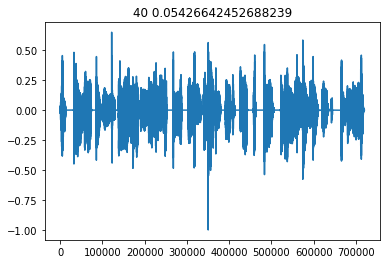

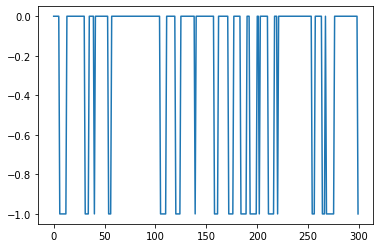

In [339]:
raw = np.zeros(n_total_sample)
label = np.zeros((int(sr*len_sec/(2400)),4,3)) # [n_label_frame, max_class, (class,azimuth,elevation)]
label[:,:,0]=-1


is_enough = False

avg_energy_std = None

idx_last = 0

cnt = 0
for i_amount in range(amount) : 
    # Load
    path_data = list_ratio[np.random.randint(len(list_ratio))]
    data,_ = librosa.load(path_data,sr=sr)

    # Sampling
    data_sed = librosa.effects.split(data,top_db=25)    
    intv_chunk = data_sed[np.random.randint(len(data_sed))]
    data = data[intv_chunk[0]:intv_chunk[1]]
    
    # normalization
    data = data/np.max(np.abs(data))
  
   # print("step : {} | {}  | {} / {} ({})".format(cnt,len(data),occ,n_total_sample,occ/n_total_sample))
         
    # scaling 
    if avg_energy_std is None :
        avg_energy = np.mean(np.abs(data))
        avg_energy_std  = avg_energy
    else : 
        avg_energy = np.mean(np.abs(data))
        weight = avg_energy_std/avg_energy
        data = data*weight
   
    # interval
    idx_intv = i_amount*len_chunk
    
    # pass
    if idx_last >= (i_amount+1)*len_chunk :
        continue
    
    # over
    if idx_last > idx_start :
        idx_intv = idx_last
    
    idx_start = np.random.randint(low=idx_intv,high=(i_amount+1)*len_chunk)
    
    # not enough space
    if idx_start + len(data) >= n_total_sample :
        continue
    
    # Spread
    raw[idx_start : idx_start + len(data)] = data
    label[int(idx_start/2400): int((idx_start + len(data))/2400),0,0] = 0
    
    cnt+=1
    
normalization_coef = np.max(np.abs(raw))
normalized_avg_energy = avg_energy_std/normalization_coef
raw = raw/normalization_coef
plt.figure()
plt.title("{} {}".format(cnt,normalized_avg_energy))
plt.plot(raw)    

plt.figure()
plt.plot(label[:,0,0])

In [361]:
for i in range(0):
    print(i)

## Label